

# Project 4 - Predicting a Continuous Target with Regression (Titanic)
**Author:** AARON 
**Date:** November 14, 2025 
**Objective:** 



## Introduction
- 


## Section 1. Import and Inspect the Data
 

### 1.1 Include Imports

In [155]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


### 1.2 Load the dataset and display basic information

In [156]:

# Load Titanic dataset from seaborn and verify
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 1.3 Check for missing values and display summary statistics

In [157]:
# Check for missing values using the isnull() method and then the sum() method. 
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [158]:
# Display summary statistics using the describe() method

print(titanic.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [159]:
# Check for correlations using the corr() method and tell it to use only the numeric features. 

print(titanic.corr(numeric_only=True))

            survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
sibsp      -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.280328 -0.253586 -0.349943 -0.182024   
alone      -0.203367  0.135207  0.198270 -0.584471 -0.583398 -0.271832   

            adult_male     alone  
survived     -0.557080 -0.203367  
pclass        0.094035  0.135207  
age           0.280328  0.198270  
sibsp        -0.253586 -0.584471  
parch        -0.349943 -0.583398  
fare         -0.182024 -0.271832  
adult_male    1.000000  0.404744  
alone         0.404744  1.000000  


## Section 2. Data Exploration and Preparation
### 2.1 Explore Data Patterns and Distributions

In [160]:
# Inpute missing values for age using median

titanic['age'] = titanic['age'].fillna(titanic['age'].median())
# Drop rows with missing fare
titanic = titanic.dropna(subset=['fare'])


### 2.2 Feature Engineering

In [161]:
# Create numeric variables. family_size from sibsp + parch + 1
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# Create numeric variables. class from sibsp + parch + 1

titanic['class_survive'] = titanic['survived'] - titanic['pclass']


## Section 3. Feature Selection and Justification
### 3.1 Choose features and target



Case 1: 
input features: 'Age'
target: fare

Case 2:
input features - 'Family Size'
target: fare

Case 3:
input features -  'Age' and 'Family Size'
target: fare

Case 4:
input features -  'Class Survive' and 'Family Size'
target: fare


### 3.2 Define X and y

Assign input features to X a pandas DataFrame with 1 or more input features
Assign target variable to y (as applicable) - a pandas Series with a single target feature

In [162]:
# Case 1: Features = Age
X1 = titanic[['age']]
y1 = titanic['fare']
 

# Case 2: Features = Family Size
X2 = titanic[['family_size']]
y2 = titanic['fare']
 

# Case 3: Features = Age + Family Size
X3 = titanic[['age', 'family_size']]
y3 = titanic['fare']

# Case 3: Features = Class + Survive + Family Size
X4 = titanic[['class_survive', 'family_size']]
y4 = titanic['fare']

### Reflection 2 and 3:
- Why might these features affect a passenger’s fare:   I'm not sure age would help determine fare much except for younger children.  Family size would have some bearing as they could buy at a group rate.  
- List all available features:  survived, pclass, sex, age, sibsp, parch, embarked, class, who, adult_male, deck, embark_town, alive, alone 
- Which other features could improve predictions and why:  I think class is the main determining factor on fare. 
- How many variables are in your Case 4:  Three.  I combined class and survived to produce a number between -3 and 0.  I also have family size.
- Which variable(s) did you choose for Case 4 and why do you feel those could make good inputs:  I don't know for sure, but fare may have had an impact on who survived.  I am combining that with class to get two variable into one.  It also weights the equation nicely.  I'm real excited to see how this predicts the result.

## Section 4. Train a Regression Model (Linear Regression)
 

Split the data into training and test sets.

### 4.1 Split the Data

In [163]:

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

### 4.2 Train and Evaluate Linear Regression Models (all 4 cases)
Create and train all 4 cases.

In [164]:
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

# Predictions

y1_pred_train = lr_model1.predict(X1_train)
y1_pred_test = lr_model1.predict(X1_test)

y2_pred_train = lr_model2.predict(X2_train)
y2_pred_test = lr_model2.predict(X2_test)

y3_pred_train = lr_model3.predict(X3_train)
y3_pred_test = lr_model3.predict(X3_test)

y4_pred_train = lr_model4.predict(X4_train)
y4_pred_test = lr_model4.predict(X4_test)

### 4.3 Evaluate Model Performance

In [165]:
print("Case 1: Training R²:", r2_score(y1_train, y1_pred_train))
print("Case 1: Test R²:", r2_score(y1_test, y1_pred_test))
print("Case 1: Test RMSE:", mean_squared_error(y1_test, y1_pred_test))
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y1_pred_test))



Case 1: Training R²: 0.009950688019452314
Case 1: Test R²: 0.0034163395508415295
Case 1: Test RMSE: 1441.8455811188421
Case 1: Test MAE: 25.28637293162364


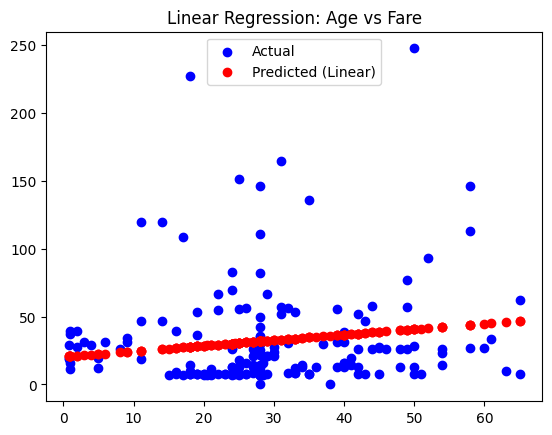

In [166]:
plt.scatter(X1_test, y1_test, color='blue', label='Actual')
plt.scatter(X1_test, y1_pred_test, color='red', label='Predicted (Linear)')
plt.legend()
plt.title("Linear Regression: Age vs Fare")
plt.show()

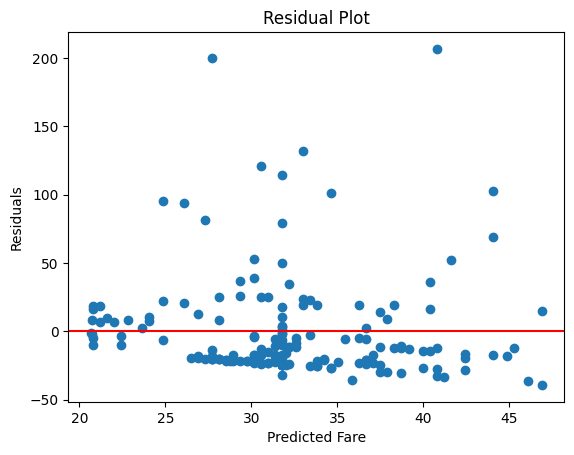

In [167]:
residuals = y1_test - y1_pred_test
plt.scatter(y1_pred_test, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Fare")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [168]:
print("Case 2: Training R²:", r2_score(y2_train, y2_pred_train))
print("Case 2: Test R²:", r2_score(y2_test, y2_pred_test))
print("Case 2: Test RMSE:", mean_squared_error(y2_test, y2_pred_test))
print("Case 2: Test MAE:", mean_absolute_error(y2_test, y2_pred_test))

Case 2: Training R²: 0.049915792364760736
Case 2: Test R²: 0.022231186110131973
Case 2: Test RMSE: 1414.6244812277246
Case 2: Test MAE: 25.02534815941641


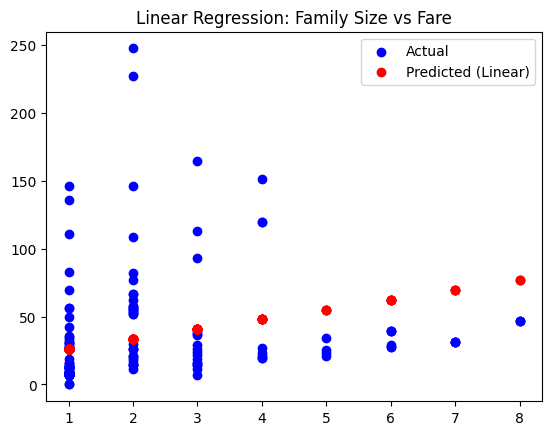

In [169]:
plt.scatter(X2_test, y2_test, color='blue', label='Actual')
plt.scatter(X2_test, y2_pred_test, color='red', label='Predicted (Linear)')
plt.legend()
plt.title("Linear Regression: Family Size vs Fare")
plt.show()

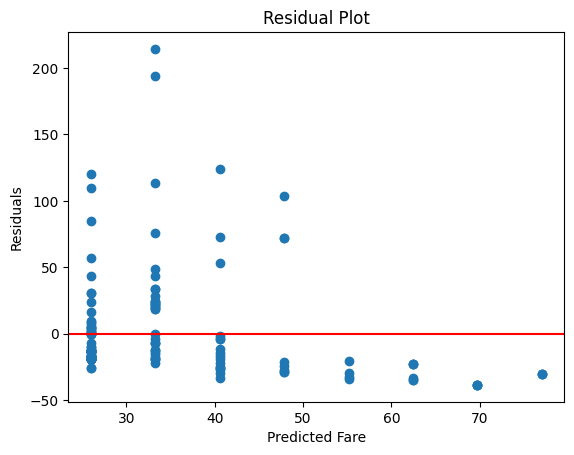

In [170]:
residuals = y2_test - y2_pred_test
plt.scatter(y2_pred_test, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Fare")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [171]:
print("Case 3: Training R²:", r2_score(y3_train, y3_pred_train))
print("Case 3: Test R²:", r2_score(y3_test, y3_pred_test))
print("Case 3: Test RMSE:", mean_squared_error(y3_test, y3_pred_test))
print("Case 3: Test MAE:", mean_absolute_error(y3_test, y3_pred_test))



Case 3: Training R²: 0.07347466201590014
Case 3: Test R²: 0.049784832763073106
Case 3: Test RMSE: 1374.7601875944658
Case 3: Test MAE: 24.284935030470688


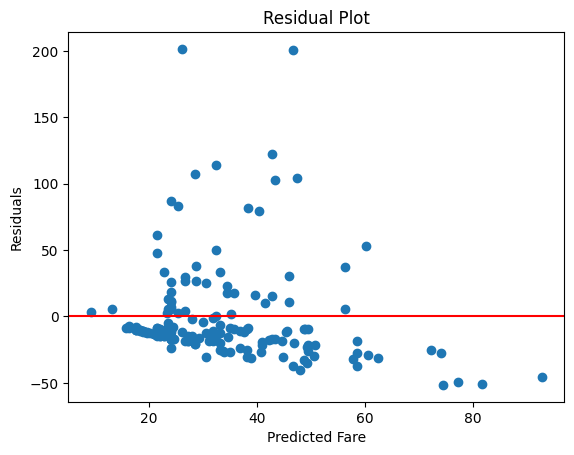

In [172]:
residuals = y3_test - y3_pred_test
plt.scatter(y3_pred_test, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Fare")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [173]:
print("Case 4: Training R²:", r2_score(y4_train, y4_pred_train))
print("Case 4: Test R²:", r2_score(y4_test, y4_pred_test))
print("Case 4: Test RMSE:", mean_squared_error(y4_test, y4_pred_test))
print("Case 4: Test MAE:", mean_absolute_error(y4_test, y4_pred_test))

Case 4: Training R²: 0.32930372730847557
Case 4: Test R²: 0.412862387766064
Case 4: Test RMSE: 849.4638285827654
Case 4: Test MAE: 19.767219512272867


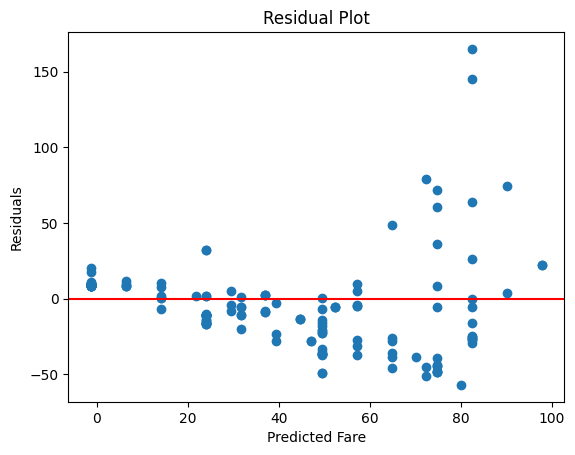

In [174]:
residuals = y4_test - y4_pred_test
plt.scatter(y4_pred_test, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Fare")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

Decision Tree Data

### Reflection 4:
Compare the train vs test results for each.


| Model Type    | Case   | Features Used                 | Training R² | Test R²   | RMSE    | MAE    | Notes |
|---------------|--------|-------------------------------|-------------|-----------|---------|--------|-------|
| Decision Tree | Case 1 | Age                           | 0.0099      | 0.0034    | 1441.84 | 25.28  | -     |
|               | Case 2 | Family Size                   | 0.0499      | 0.0222    | 1414.62 | 25.02  | -     |
|               | Case 3 | Age, Family Size              | 0.0734      | 0.0497    | 1374.76 | 24.28  | -     |
|               | Case 4 | Family Size, Survived, Class  | 0.3293      | 0.4128    | 849.46  | 19.76  | -     |
|---------------|--------|--------------------|----------|-------------|-----------|---------|--------|-------|

- Did Case 1 overfit or underfit? Explain:  Case 1 is an underfit.  R2 are very low.
- Did Case 2 overfit or underfit? Explain:  Case 2 is an underfit.  The is a small improvement, but R2 are very low.
- Did Case 3 overfit or underfit? Explain:  Case 3 is an underfit.  The is a small improvement, R2 are very low.
- Did Case 4 overfit or underfit? Explain:  Case 4 is not overfit or underfit.  It's odd that the test set did better, but that does not mean it's overfit.

### Adding Age

- Did adding age improve the model: The model improved slightly from Case 2 to Case 3.
- Propose a possible explanation (consider how age might affect ticket price, and whether the data supports that):  I think age coupled with family size would improve where an entry was a child who was part of a family.  The fare price for the family would account for that.

### Worst

- Which case performed the worst: Case 1 - Age
- How do you know: The R2 value was almost 0.
- Do you think adding more training data would improve it (and why/why not):  I don't think adding more training data would help.  Age does not make a meaningful impact.

### Best

- Which case performed the best: Case 4 - Family Size, Survived, Class
- How do you know: The R2 was 10 times better. and the RMSE and MAE we noticeable lower.
- Do you think adding more training data would improve it (and why/why not):  I'm not sure.  In my case the test set performed better than the training set.  So it makes me think I had a good split or I maxed out any training data.

## Section 5. Compare Alternative Models



### 5.1 Ridge Regression (L2 penalty)

In [175]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X4_train, y4_train)
y_pred_ridge = ridge_model.predict(X4_test)


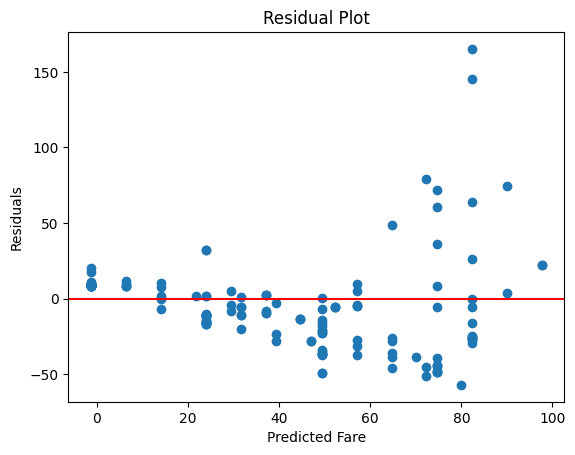

In [176]:
residuals = y4_test - y_pred_ridge
plt.scatter(y_pred_ridge, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Fare")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

### 5.2 Elastic Net (L1 + L2 combined)

In [177]:
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X4_train, y4_train)
y_pred_elastic = elastic_model.predict(X4_test)

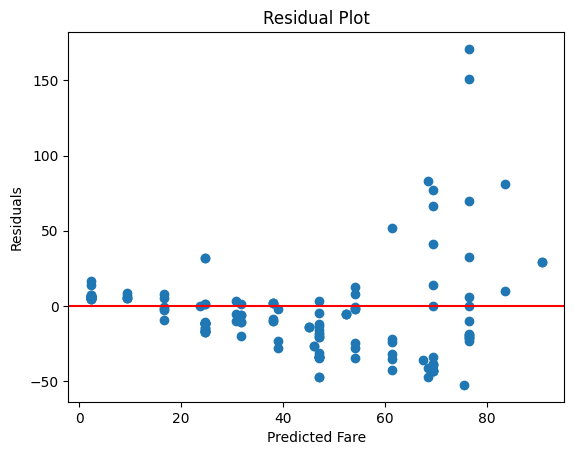

In [178]:
residuals = y4_test - y_pred_elastic
plt.scatter(y_pred_elastic, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Fare")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

### 5.3 Polynomial Regression

In [179]:
# Set up the poly inputs
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X4_train)
X_test_poly = poly.transform(X4_test)

In [180]:
# Use the poly inputs in the LR model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y4_train)
ycase4_pred_poly = poly_model.predict(X_test_poly)

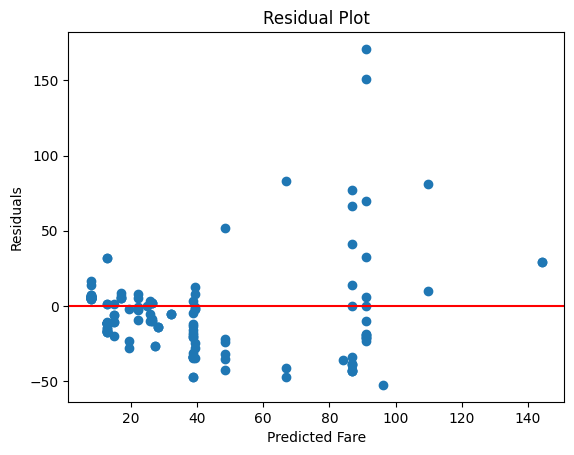

In [181]:
residuals = y4_test - y_pred_elastic
plt.scatter(ycase4_pred_poly, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Fare")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

### 5.4 Visualize Polynomial Cubic Fit (for 1 input feature)

In [182]:
# Set up the poly inputs
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X2_train)
X_test_poly = poly.transform(X2_test)

In [183]:
# Use the poly inputs in the LR model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y2_train)
ycubic_pred_poly = poly_model.predict(X_test_poly)

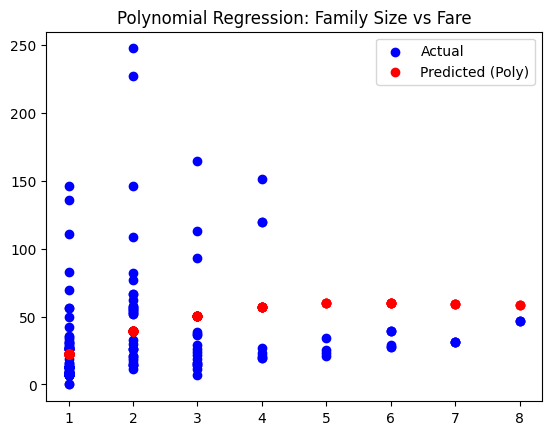

In [184]:
plt.scatter(X2_test, y2_test, color='blue', label='Actual')
plt.scatter(X2_test, ycubic_pred_poly, color='red', label='Predicted (Poly)')
plt.legend()
plt.title("Polynomial Regression: Family Size vs Fare")
plt.show()

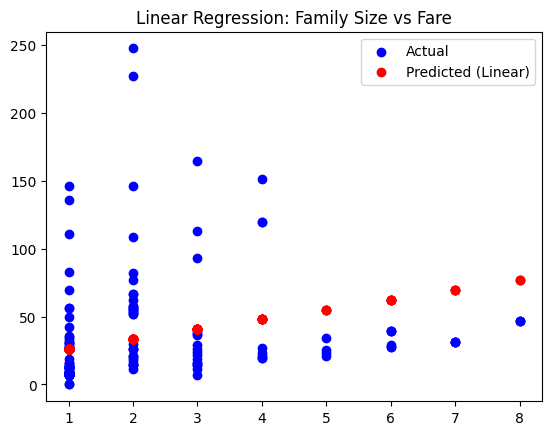

In [185]:
plt.scatter(X2_test, y2_test, color='blue', label='Actual')
plt.scatter(X2_test, y2_pred_test, color='red', label='Predicted (Linear)')
plt.legend()
plt.title("Linear Regression: Family Size vs Fare")
plt.show()

In [186]:
def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    print(f"{name} RMSE: {mean_squared_error(y_true, y_pred):.2f}")
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

report("Polynomial Cubic Case 2", y2_test, ycubic_pred_poly)

Polynomial Cubic Case 2 R²: 0.088
Polynomial Cubic Case 2 RMSE: 1319.24
Polynomial Cubic Case 2 MAE: 24.07



### 5.4 Reflections (in a Markdown cell):
- What patterns does the cubic model seem to capture:  For smaller family sizes it predicted lower fare values.
- Where does it perform well or poorly:  It does a little better than a straight linear line does when the family size is bigger.
- Did the polynomial fit outperform linear regression: Yes the R2 value 0.088 for poly but 0.022 for Linear.
- Where (on the graph or among which kinds of data points) does it fit best:  The prediction is best for two family members.  Followed by alone and then three family members.

| Model Type    | Case   | Features Used                 | Test R²   | RMSE    | MAE    | Notes |
|---------------|--------|-------------------------------|-----------|---------|--------|-------|
| Linear        | Case 2 | Family Size                   | 0.022    | 1414.62 | 25.02  | -     |
| Poly Cubic    | Case 2 | Family Size                   | 0.088     | 1319.24 | 24.07  | -     |

### 5.5 Visualize Higher Order Polynomial (for the same 1 input case)

In [187]:
# Set up the poly inputs
poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X2_train)
X_test_poly = poly.transform(X2_test)

In [188]:
# Use the poly inputs in the LR model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y2_train)
y5_pred_poly = poly_model.predict(X_test_poly)

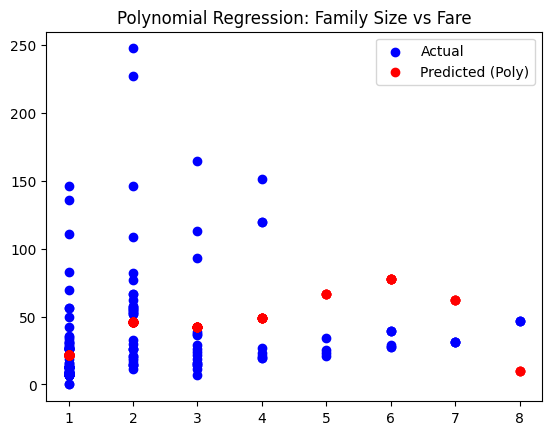

In [189]:
plt.scatter(X2_test, y2_test, color='blue', label='Actual')
plt.scatter(X2_test, y5_pred_poly, color='red', label='Predicted (Poly)')
plt.legend()
plt.title("Polynomial Regression: Family Size vs Fare")
plt.show()

### 5.4 Compare All Models

In [190]:
def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    print(f"{name} RMSE: {mean_squared_error(y_true, y_pred):.2f}")
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

report("Linear Case 4", y4_test, y4_pred_test)
report("Ridge Case 4", y4_test, y_pred_ridge)
report("ElasticNet Case 4", y4_test, y_pred_elastic)
report("Polynomial Cubic Case 4", y4_test, ycase4_pred_poly)
report("Polynomial Cubic Case 2", y2_test, ycubic_pred_poly)
report("Polynomial 5th Order Case 2", y2_test, y5_pred_poly)

Linear Case 4 R²: 0.413
Linear Case 4 RMSE: 849.46
Linear Case 4 MAE: 19.77

Ridge Case 4 R²: 0.413
Ridge Case 4 RMSE: 849.11
Ridge Case 4 MAE: 19.75

ElasticNet Case 4 R²: 0.429
ElasticNet Case 4 RMSE: 825.78
ElasticNet Case 4 MAE: 18.18

Polynomial Cubic Case 4 R²: 0.469
Polynomial Cubic Case 4 RMSE: 768.20
Polynomial Cubic Case 4 MAE: 15.49

Polynomial Cubic Case 2 R²: 0.088
Polynomial Cubic Case 2 RMSE: 1319.24
Polynomial Cubic Case 2 MAE: 24.07

Polynomial 5th Order Case 2 R²: 0.065
Polynomial 5th Order Case 2 RMSE: 1352.24
Polynomial 5th Order Case 2 MAE: 24.34



| Model Type      | Case   | Features Used                 | Test R²  | RMSE   | MAE    | Notes |
|-----------------|--------|-------------------------------|----------|--------|--------|-------|
| Linear          | Case 4 | Family Size, Class + Survived | 0.413    | 849.46 | 19.77  | -     |
| Ridge Case      | Case 4 | Family Size, Class + Survived | 0.413    | 849.11 | 19.75  | -     |
| ElasticNet      | Case 4 | Family Size, Class + Survived | 0.429    | 825.78 | 18.18  | -     |
| Polynomial Cubic| Case 4 | Family Size, Class + Survived | 0.469    | 768.20 | 15.49  | -     |
| Polynomial Cubic| Case 2 | Family Size                   | 0.088    | 1319.24| 24.07  | -     |
| Poly 5th Order  | Case 2 | Family Size                   | 0.065    | 1352.24| 24.34  | -     |


### Cubic vs 5th Order Comparison 

- The 5th order underperforms the cubic Polynominal model because it shows as almost a straight line for the first six family number values.  It is almost linear for those first six feature points.  The last two feature points it dropped aggresively which did not really help the prediction.  
- Although the cubic was not great, it did better than linear and the 5th order.  The main reason is seen by the prediction line bending after feature point three instead of a steady slope up which does not correspond to the actual outcomes.


## Section 6. Final Thoughts & Insights

### 6.1 Summarize Findings


- What features were most useful?  The engineered feature class and survival had the largest positive effect on predicting fare.

- What regression model performed best?  The Polynomial Cubic Model iterated on Case 4 had the best metrics. Yet, I don't think it is the best model.  I had a hard time visualizing these models.  I add a "residuals" graphic to each of Case 4 models.  
- The goal is to have it evenly distributed around 0 all the way through the range with as little amplitude as possible.
- The first three models had that characteristic for 2/3 of the range and then started having higher amplitues at the larger fare values.
However, the Polynomial Cubic Model had only three areas with very high amplitude.  This leads me to believe that it has overfitted the training data and that Ridge or ElasticNet should be used. 

- How did model complexity or regularization affect results?  I think regularization had some positive effect, but it was pretty minor.  I was a little disappointed Ridge and ElasticNet did not have a higher impact.  I suspect the input features would need to be adjusted for more of a step function change.
  
- Further Discussion:  I chose to combine class and survived as a engineered feature.  After doing some more reading that may have a causality type effect.  I'll need to keep an eye out for this in the future, but I feel like the use of both here enhanced the prediction without causing a causality type effect.

### 6.2 Discuss Challenges
- Was fare hard to predict? Why?  Fare was hard to predict with the given inputs.  There was a very low R2 value for Age, Family Size, and even for Age and Family Size engineered parameter.  Class really is what helped the models perform up to 10 times better when coupled with Family Size. 

- Did skew or outliers impact the models?  Outliers had a decided effect on the models.  A few points were so high with no real basis in the features used in the models.